In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Data which was cleaned in the phase 1 is loaded to csv and we are using this file for phase 2
crashes = pd.read_csv('crashes_cleaned.csv')
crashes.shape

(66218, 118)

In [3]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66218 entries, 0 to 66217
Columns: 118 entries, CRASH_RECORD_ID to PRIM_CONTRIBUTORY_CAUSE_YIELDING ISSUES
dtypes: bool(94), float64(15), int64(6), object(3)
memory usage: 18.1+ MB


In [4]:
crashes.describe()

,POSTED_SPEED_LIMIT,LIGHTING_CONDITION,REPORT_TYPE,CRASH_TYPE,HIT_AND_RUN_I,DAMAGE,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,6.621800e+04,66218.000000,66218.000000,66218.000000,66218.000000,66218.000000,6.621800e+04,6.621800e+04,66218.000000,6.621800e+04,...,6.621800e+04,6.621800e+04,6.621800e+04,6.621800e+04,66218.0,6.621800e+04,6.621800e+04,6.621800e+04,6.621800e+04,6.621800e+04
mean,-2.017307e-17,1.799133,1.438219,1.291884,0.985789,2.605938,-1.480789e-16,3.180478e-16,1.246942,-2.575286e-18,...,-1.459328e-17,3.347871e-17,5.536864e-17,9.614399e-17,0.0,1.426064e-16,-3.068882e-17,-1.304811e-16,-8.289844e-15,-1.230343e-14
std,1.000008e+00,1.407563,0.496172,0.454633,0.118359,0.653090,1.000008e+00,1.000008e+00,0.635733,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-5.150468e+00,1.000000,1.000000,1.000000,0.000000,1.000000,-1.642222e+00,-2.328437e+00,1.000000,-3.597346e-01,...,-1.201834e-01,-2.738362e-01,-2.078611e-01,-1.799846e+00,0.0,-2.317225e+00,-1.575168e+00,-1.491381e+00,-1.026477e+02,-2.896442e-01
25%,2.441956e-01,1.000000,1.000000,1.000000,1.000000,2.000000,-7.574532e-01,-8.904408e-02,1.000000,-3.597346e-01,...,-1.201834e-01,-2.738362e-01,-2.078611e-01,-8.908217e-01,0.0,-7.308129e-01,-1.072532e+00,-9.855147e-01,-1.688944e-01,-5.814442e-02
50%,2.441956e-01,1.000000,1.000000,1.000000,1.000000,3.000000,-7.434894e-02,-8.904408e-02,1.000000,-3.597346e-01,...,-1.201834e-01,-2.738362e-01,-2.078611e-01,1.820301e-02,0.0,1.505271e-01,-6.726051e-02,2.621846e-02,4.971079e-02,-3.226613e-03
75%,2.441956e-01,2.000000,2.000000,2.000000,1.000000,3.000000,7.905378e-01,-8.904408e-02,1.000000,-3.597346e-01,...,-1.201834e-01,-2.738362e-01,-2.078611e-01,1.820301e-02,0.0,6.793311e-01,9.380112e-01,1.037952e+00,1.773622e-01,4.545814e-02
max,7.437080e+00,6.000000,2.000000,2.000000,1.000000,3.000000,6.863207e+00,3.574124e+01,5.000000,3.356627e+01,...,5.913749e+01,2.570761e+01,3.042244e+01,7.290401e+00,0.0,1.736939e+00,1.440647e+00,1.543818e+00,4.052797e-01,1.047549e+02


In [5]:
cat_cols = crashes.select_dtypes(include = ['object']).columns
cat_cols

Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'DATE_POLICE_NOTIFIED'], dtype='object')

In [6]:
#dropping object columns
crashes.drop(columns = cat_cols, inplace = True)
crashes.shape

(66218, 115)

In [7]:
X = crashes.drop(['CRASH_TYPE'],axis = 1)
y = crashes['CRASH_TYPE']-1

In [8]:
y.unique()

array([1, 0])

In [9]:
#splitting the data to training data and test data for applying ML models
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y, test_size = 0.2, random_state = 7, stratify = y)
#Splitting the training data to train data and validation data for tuning the models and selecting the best parameters 
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size = 0.25, random_state = 7, stratify = y_train_val)


In [10]:
print(f"Training data size : X_train : {X_train.shape} , y_train : {y_train.shape}")
print(f"Validation data size : X_train : {X_val.shape} , y_train : {y_val.shape}")
print(f"Testing data size : X_train : {X_test.shape} , y_train : {y_test.shape}")

Training data size : X_train : (39730, 114) , y_train : (39730,)
Validation data size : X_train : (13244, 114) , y_train : (13244,)
Testing data size : X_train : (13244, 114) , y_train : (13244,)


In [24]:
#importing necessary model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [12]:
#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data with the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Hyperparameter grids for each model
param_grids = {
    'log_reg': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'knn': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'svm': {
        'C': [0.1, 1, 10],
    },
    'rf': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'xgb': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9]
    }
}

In [19]:
# Models
models = {
    'log_reg': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(),
    'rf': RandomForestClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


## Hyperparameter Tuning

In [20]:
#Hyperparameter Tuning
best_models = {}
validation_scores = {}

# Function to perform hyperparameter tuning and validation
def hyperparameter_tuning(model_name, model, param_grid):
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')  # Use 'accuracy' or 'neg_mean_squared_error' for regression
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    
    # Validate on validation set
    val_score = accuracy_score(y_val, best_model.predict(X_val_scaled)) if model_name != 'lin_reg' else mean_squared_error(y_val, best_model.predict(X_val_scaled))
    print(f"{model_name} Validation Score: {val_score}")
    
    best_models[model_name] = best_model
    validation_scores[model_name] = val_score

# Perform hyperparameter tuning and validation for each model
for model_name, model in models.items():
    hyperparameter_tuning(model_name, model, param_grids[model_name])


Tuning log_reg...
log_reg Validation Score: 0.8909694956206584
Tuning knn...
knn Validation Score: 0.8608426457263667
Tuning svm...
svm Validation Score: 0.8871186952582302
Tuning rf...
rf Validation Score: 0.8933856840833585
Tuning xgb...
xgb Validation Score: 0.8945937783147085


In [21]:
print("Validation Scores:")
print(validation_scores)

Validation Scores:
{'log_reg': 0.8909694956206584, 'knn': 0.8608426457263667, 'svm': 0.8871186952582302, 'rf': 0.8933856840833585, 'xgb': 0.8945937783147085}


## Naive Bayes classifier

In [25]:
# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the Naive Bayes model
print("Training Naive Bayes model...")
nb.fit(X_train_scaled, y_train)

# Test the Naive Bayes model
print("Testing Naive Bayes model...")
nb_predictions = nb.predict(X_test_scaled)
nb_test_score = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Test Accuracy: {nb_test_score}")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))

Training Naive Bayes model...
Testing Naive Bayes model...
Naive Bayes Test Accuracy: 0.8563877982482634
Confusion Matrix:
[[9128  250]
 [1652 2214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      9378
           1       0.90      0.57      0.70      3866

    accuracy                           0.86     13244
   macro avg       0.87      0.77      0.80     13244
weighted avg       0.86      0.86      0.85     13244



## Logistic Regression model

In [26]:
# Train the best Logistic Regression model
print("Training Logistic Regression model...")
best_log_reg = best_models['log_reg']
best_log_reg.fit(X_train_scaled, y_train)

# Test the Logistic Regression model
print("Testing Logistic Regression model...")
log_reg_predictions = best_log_reg.predict(X_test_scaled)
log_reg_test_score = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression Test Accuracy: {log_reg_test_score}")

Training Logistic Regression model...
Testing Logistic Regression model...
Logistic Regression Test Accuracy: 0.890289942615524


In [46]:
print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      9378
           1       0.88      0.73      0.79      3866

    accuracy                           0.89     13244
   macro avg       0.89      0.84      0.86     13244
weighted avg       0.89      0.89      0.89     13244



## K-Nearest Neighbors Model

In [27]:
# Train the best K-NN model
print("Training K-NN model...")
best_knn = best_models['knn']
best_knn.fit(X_train_scaled, y_train)

# Test the K-NN model
print("Testing K-NN model...")
knn_predictions = best_knn.predict(X_test_scaled)
knn_test_score = accuracy_score(y_test, knn_predictions)
print(f"K-NN Test Accuracy: {knn_test_score}")

Training K-NN model...
Testing K-NN model...
K-NN Test Accuracy: 0.8574448807006947


In [47]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      9378
           1       0.85      0.62      0.72      3866

    accuracy                           0.86     13244
   macro avg       0.86      0.79      0.81     13244
weighted avg       0.86      0.86      0.85     13244



## Support Vector Machine 

In [28]:
# Train the best SVM model
print("Training SVM model...")
best_svm = best_models['svm']
best_svm.fit(X_train_scaled, y_train)

# Test the SVM model
print("Testing SVM model...")
svm_predictions = best_svm.predict(X_test_scaled)
svm_test_score = accuracy_score(y_test, svm_predictions)
print(f"SVM Test Accuracy: {svm_test_score}")

Training SVM model...
Testing SVM model...
SVM Test Accuracy: 0.8832678948958018


In [48]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      9378
           1       0.87      0.71      0.78      3866

    accuracy                           0.88     13244
   macro avg       0.88      0.83      0.85     13244
weighted avg       0.88      0.88      0.88     13244



## Random Forest Classifier

In [29]:
# Train the best Random Forest model
print("Training Random Forest model...")
best_rf = best_models['rf']
best_rf.fit(X_train_scaled, y_train)

# Test the Random Forest model
print("Testing Random Forest model...")
rf_predictions = best_rf.predict(X_test_scaled)
rf_test_score = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Test Accuracy: {rf_test_score}")

Training Random Forest model...
Testing Random Forest model...
Random Forest Test Accuracy: 0.8918000604047116


In [49]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      9378
           1       0.91      0.70      0.79      3866

    accuracy                           0.89     13244
   macro avg       0.90      0.84      0.86     13244
weighted avg       0.89      0.89      0.89     13244



## XGBoost Classifier

In [30]:
# Train the best XGBoost model
print("Training XGBoost model...")
best_xgb = best_models['xgb']
best_xgb.fit(X_train_scaled, y_train)

# Test the XGBoost model
print("Testing XGBoost model...")
xgb_predictions = best_xgb.predict(X_test_scaled)
xgb_test_score = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Test Accuracy: {xgb_test_score}")

Training XGBoost model...
Testing XGBoost model...
XGBoost Test Accuracy: 0.893083660525521


In [50]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      9378
           1       0.89      0.73      0.80      3866

    accuracy                           0.89     13244
   macro avg       0.89      0.84      0.86     13244
weighted avg       0.89      0.89      0.89     13244



In [33]:
# Display all test scores
test_scores = {
    'Naive Bayes': nb_test_score,
    'Logistic Regression': log_reg_test_score,
    'K-NN': knn_test_score,
    'SVM': svm_test_score,
    'Random Forest': rf_test_score,
    'XGBoost': xgb_test_score
}

print("\nTest Scores for All Models:")
for model_name, score in test_scores.items():
    print(f"{model_name}: {score}")


Test Scores for All Models:
Naive Bayes: 0.8563877982482634
Logistic Regression: 0.890289942615524
K-NN: 0.8574448807006947
SVM: 0.8832678948958018
Random Forest: 0.8918000604047116
XGBoost: 0.893083660525521


## Visualizations of evaluation metrics of all models

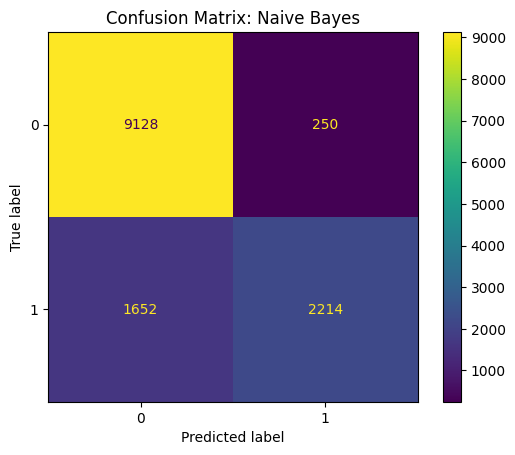

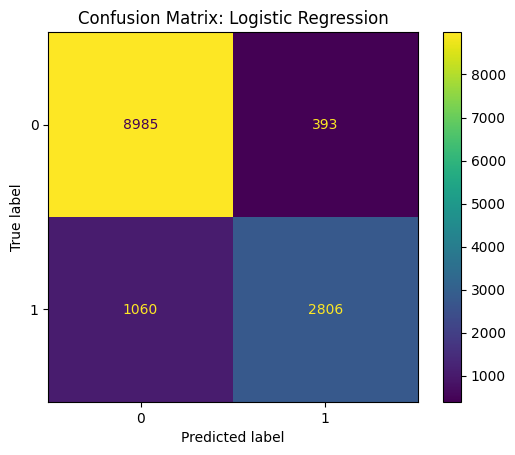

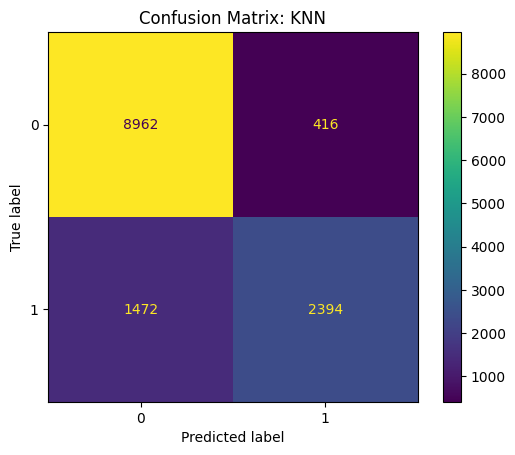

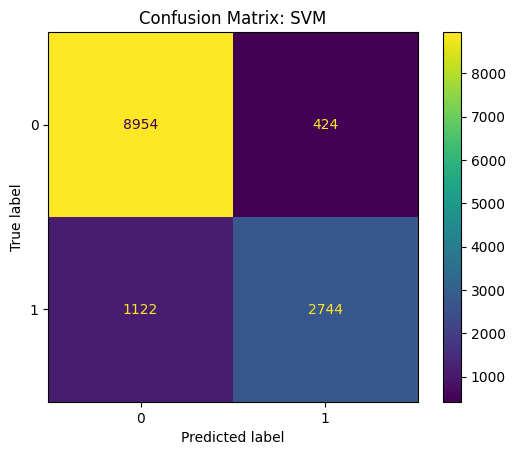

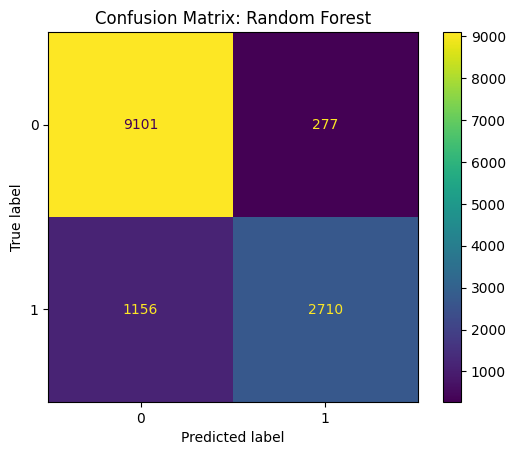

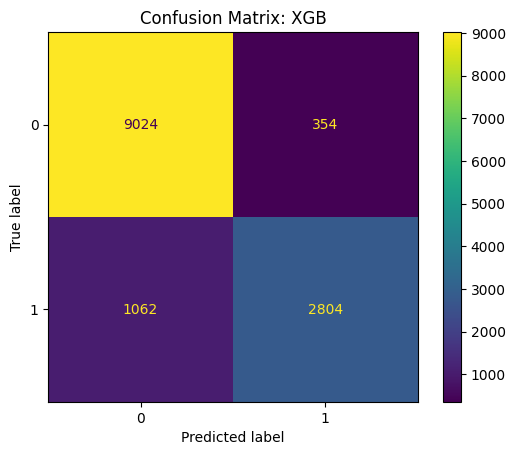

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for NaiveBayes
cm_nb = confusion_matrix(y_test, nb_predictions)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()
plt.title('Confusion Matrix: Naive Bayes')
plt.savefig('plot1.png', bbox_inches='tight')
plt.show()

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, log_reg_predictions)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp_log_reg.plot()
plt.title('Confusion Matrix: Logistic Regression')
plt.savefig('plot2.png', bbox_inches='tight')
plt.show()

# Confusion Matrix for KNN 
cm_knn = confusion_matrix(y_test, knn_predictions)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('Confusion Matrix: KNN')
plt.savefig('plot3.png', bbox_inches='tight')
plt.show()

# Confusion Matrix for SVM 
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('Confusion Matrix: SVM')
plt.savefig('plot4.png', bbox_inches='tight')
plt.show()

# Confusion Matrix for Random Forest 
cm_rf = confusion_matrix(y_test, rf_predictions)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix: Random Forest')
plt.savefig('plot5.png', bbox_inches='tight')
plt.show()

# Confusion Matrix for xgboost 
cm_xgb = confusion_matrix(y_test, xgb_predictions)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title('Confusion Matrix: XGB')
plt.savefig('plot6.png', bbox_inches='tight')
plt.show()


## ROC Curves

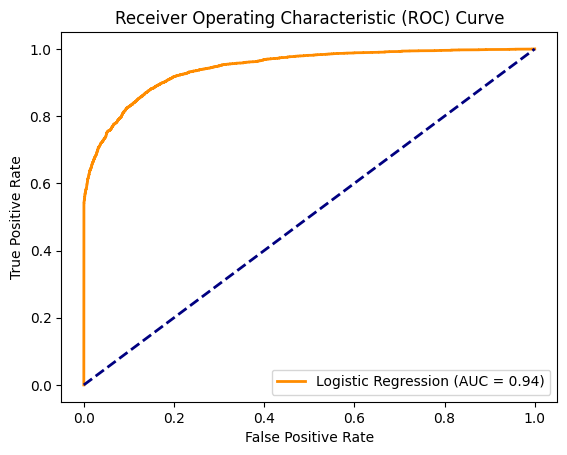

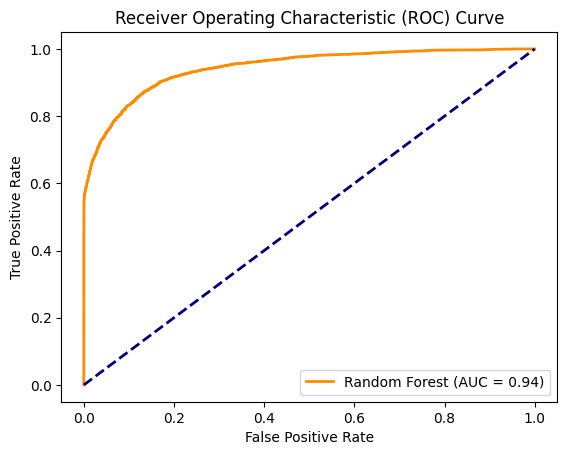

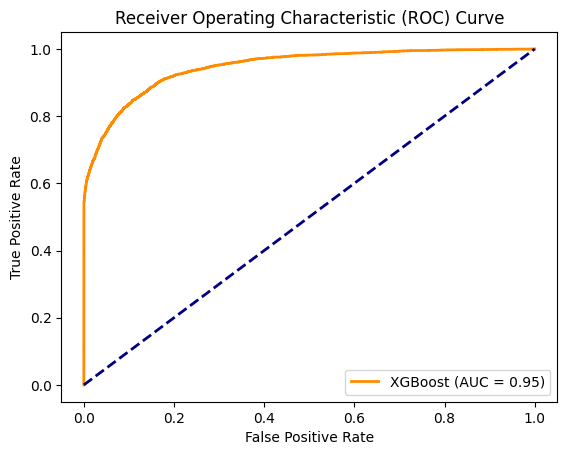

In [54]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, best_models['log_reg'].predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('plot7.png', bbox_inches='tight')
plt.show()

# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, best_models['rf'].predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('plot8.png', bbox_inches='tight')
plt.show()

# ROC Curve for XGBoost
fpr, tpr, _ = roc_curve(y_test, best_models['xgb'].predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('plot9.png', bbox_inches='tight')
plt.show()
# Repeat similarly for Random Forest and XGBoost

## Feature Importance for Random Forest and XGBoost

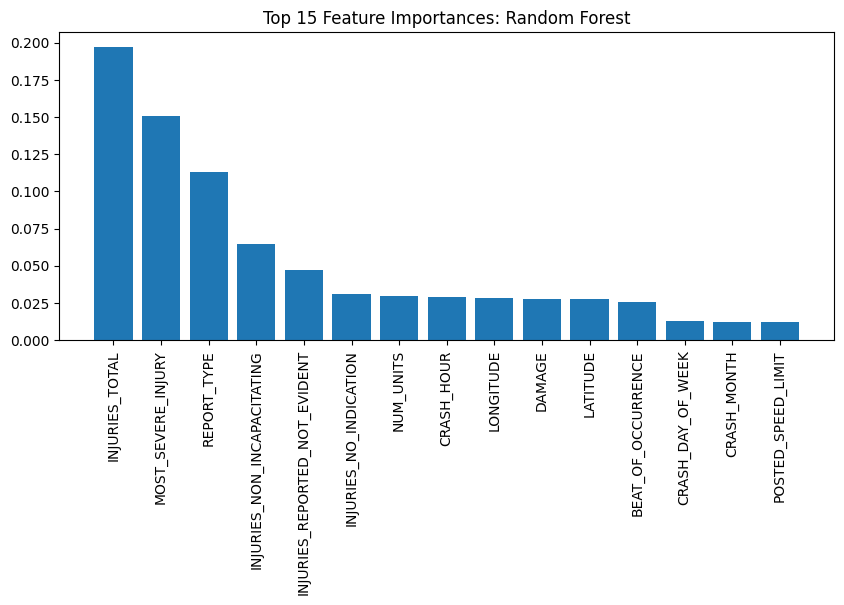

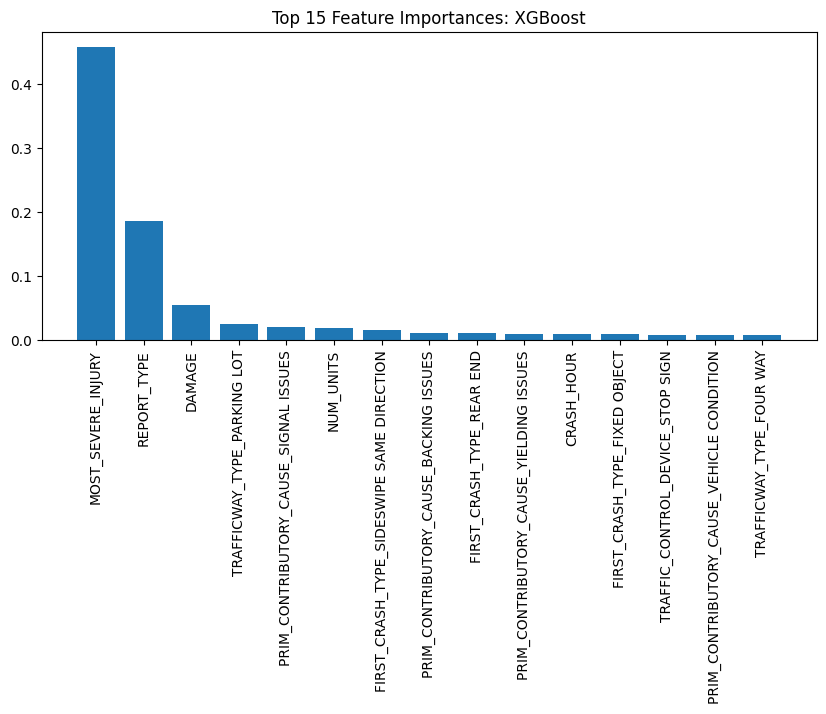

In [55]:
# Feature Importance for Random Forest (Top 15 Features)
import numpy as np
import matplotlib.pyplot as plt

importances_rf = best_models['rf'].feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Select top 15 features
top_indices_rf = indices_rf[:15]

plt.figure(figsize=(10, 4))
plt.title("Top 15 Feature Importances: Random Forest")
plt.bar(range(15), importances_rf[top_indices_rf], align="center")
plt.xticks(range(15), X.columns[top_indices_rf], rotation=90)
plt.savefig('plot10.png', bbox_inches='tight')
plt.show()

# Feature Importance for XGBoost (Top 15 Features)
importances_xgb = best_models['xgb'].feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

# Select top 15 features
top_indices_xgb = indices_xgb[:15]

plt.figure(figsize=(10, 4))
plt.title("Top 15 Feature Importances: XGBoost")
plt.bar(range(15), importances_xgb[top_indices_xgb], align="center")
plt.xticks(range(15), X.columns[top_indices_xgb], rotation=90)
plt.savefig('plot11.png', bbox_inches='tight')
plt.show()


## Logloss Plots for XGBoost

[0]	train-logloss:0.54736	eval-logloss:0.54811
[1]	train-logloss:0.50372	eval-logloss:0.50498
[2]	train-logloss:0.46859	eval-logloss:0.47049
[3]	train-logloss:0.43937	eval-logloss:0.44141
[4]	train-logloss:0.41466	eval-logloss:0.41717
[5]	train-logloss:0.39395	eval-logloss:0.39680
[6]	train-logloss:0.37610	eval-logloss:0.37918
[7]	train-logloss:0.36062	eval-logloss:0.36408
[8]	train-logloss:0.34714	eval-logloss:0.35082
[9]	train-logloss:0.33536	eval-logloss:0.33937
[10]	train-logloss:0.32503	eval-logloss:0.32919
[11]	train-logloss:0.31604	eval-logloss:0.32047
[12]	train-logloss:0.30808	eval-logloss:0.31280
[13]	train-logloss:0.30111	eval-logloss:0.30597
[14]	train-logloss:0.29481	eval-logloss:0.30001
[15]	train-logloss:0.28922	eval-logloss:0.29463
[16]	train-logloss:0.28425	eval-logloss:0.28988
[17]	train-logloss:0.27975	eval-logloss:0.28562
[18]	train-logloss:0.27563	eval-logloss:0.28193
[19]	train-logloss:0.27209	eval-logloss:0.27864
[20]	train-logloss:0.26878	eval-logloss:0.27568
[2

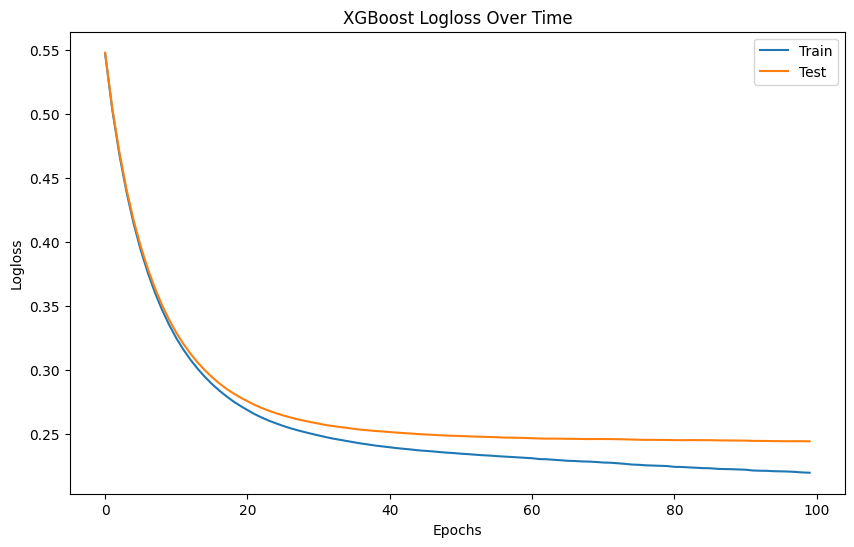

In [56]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Assuming binary classification problem
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 6
}

# Dictionary to store evaluation results
evals_result = {}

# Train with evaluation log to track loss
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    evals_result=evals_result,  # Store evals result here
    verbose_eval=True
)

# Plot the logloss over iterations
epochs = len(evals_result['train']['logloss'])
x_axis = range(0, epochs)

xgb_train_losses = evals_result['train']['logloss']
xgb_eval_losses = evals_result['eval']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['eval']['logloss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.title('XGBoost Logloss Over Time')
plt.legend()
plt.savefig('plot12.png', bbox_inches='tight')
plt.show()

## Logloss Plots for Logistic Regression

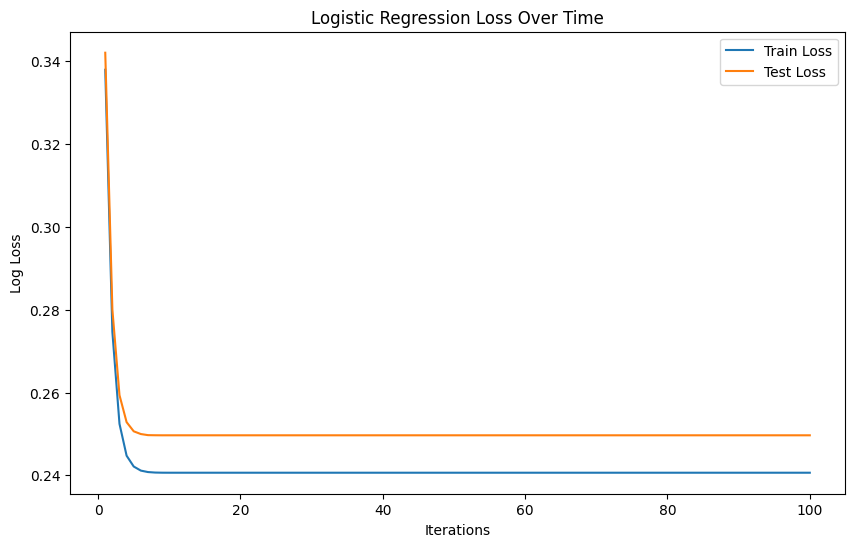

In [58]:
from sklearn.metrics import log_loss

# Logistic Regression Loss Plot
log_reg = LogisticRegression(solver='liblinear', max_iter=100)
train_losses, test_losses = [], []

for i in range(1, 101):
    log_reg.set_params(max_iter=i)
    log_reg.fit(X_train_scaled, y_train)
    
    y_train_pred = log_reg.predict_proba(X_train_scaled)[:, 1]
    y_test_pred = log_reg.predict_proba(X_test_scaled)[:, 1]
    
    train_loss = log_loss(y_train, y_train_pred)
    test_loss = log_loss(y_test, y_test_pred)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_losses, label='Train Loss')
plt.plot(range(1, 101), test_losses, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Logistic Regression Loss Over Time')
plt.legend()
plt.savefig('plot13.png', bbox_inches='tight')
plt.show()

## Random Forest Accuracy Plot 

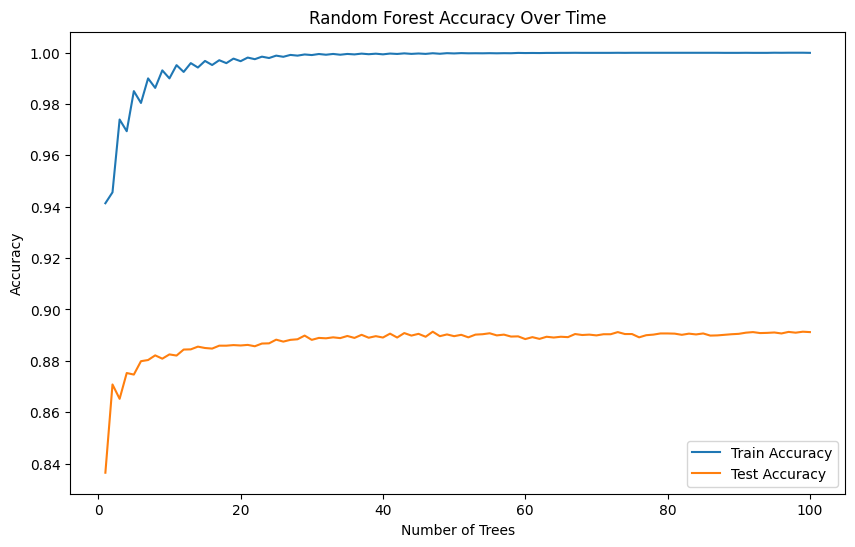

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest and track validation accuracy over n_estimators
rf = RandomForestClassifier(warm_start=True, oob_score=True)
train_accuracies, test_accuracies = [], []

for n_trees in range(1, 101):
    rf.set_params(n_estimators=n_trees)
    rf.fit(X_train_scaled, y_train)
    
    train_acc = rf.score(X_train_scaled, y_train)
    test_acc = rf.score(X_test_scaled, y_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 101), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy Over Time')
plt.legend()
plt.savefig('plot14.png', bbox_inches='tight')
plt.show()

## Loss Comparison Plot Between XGBoost and Logistic Regression

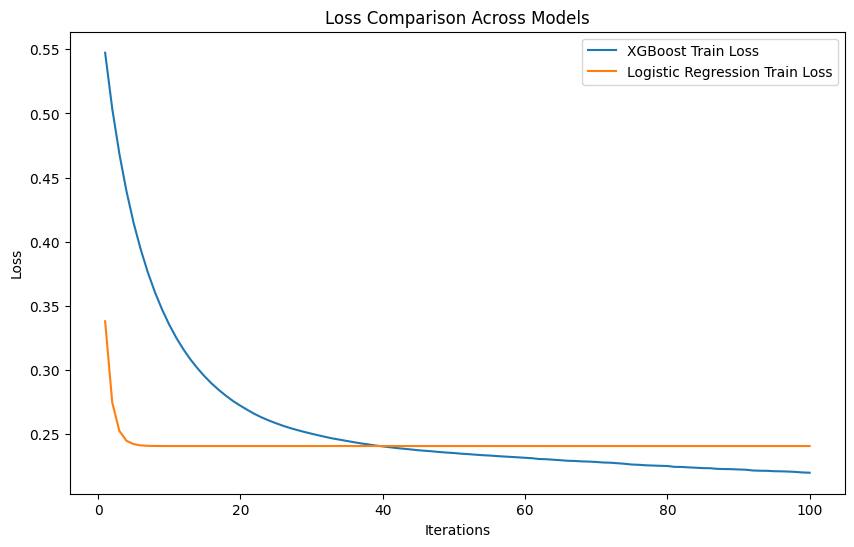

In [60]:
plt.figure(figsize=(10, 6))

# Assuming you have stored loss values for XGBoost and Logistic Regression
plt.plot(range(1, 101), xgb_train_losses, label='XGBoost Train Loss')
plt.plot(range(1, 101), train_losses, label='Logistic Regression Train Loss')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Comparison Across Models')
plt.legend()
plt.savefig('plot15.png', bbox_inches='tight')
plt.show()